<h1 align="center"> Multiple Linear Regression (MLR) from Scratch</h1>

<h1 align="center"> <a href="https://github.com/alireza365/" target="_blank" rel="noopener noreferrer">Alireza Bagheri</a></h1>

<h1>Table of contents</h1>
<ul>
    <li><a href="#Problem_setup">Problem Setup</a></li>   
    <li><a href="#Data">Data Example</a> </li>  
    <li><a href="#Analytical_solution">MLR with Analytical Solution</a></li>
    <li><a href="#Gradient_descent">MLR with Gradient Descent</a></li>
    <li><a href="#Scikit_learn">MLR with Scikit-Learn</a></li>
</ul> 

# Problem setup  <a name="Problem_setup"></a>

Multiple Linear Regression (MLR), also known as multivariable linear regression, is an extension of Simple Linear Regression (SLR). It is used when we want to predict the value of a dependent variable $y$ based on the value of $k \ge 2$ independent variables $x_1,...,x_k$. Suppose we have $n$ observations on the variables,

\begin{equation*}
{y_i} = {\beta _0} + {\beta _1}{x_{i,1}} + ... + {\beta _k}{x_{i,k}} + {e_i},
\end{equation*}

where $i = 1, ..., n$, and ${e_i}$ is a noise variable. In matrix form, we have

\begin{equation*}
{\bf{y}} = {\bf{X\beta }} + {\bf{e}},
\end{equation*}

where ${\bf{y}}$ is the vector of observed variables

\begin{equation*}
{\bf{y}} = \left[ \begin{array}{c} 
{{y_1}}\\
{{y_2}}\\
 \vdots \\
{{y_n}} 
\end{array} \right]_{n \times 1},
\end{equation*}

${\bf{X}}$ is a ${n \times \left( {k + 1} \right)}$ matrix of random variables, sometimes called the design matrix, defined as

\begin{equation*}
{\bf{X}} = {\left[ {\begin{array}{l}
1&{{x_{1,1}}}& \cdots &{{x_{1,k}}}\\
1&{{x_{2,1}}}& \cdots &{{x_{2,k}}}\\
 \vdots & \vdots & \ddots & \vdots \\
1&{{x_{n,1}}}& \cdots &{{x_{n,k}}}
\end{array}} \right]_{n \times \left( {k + 1} \right)}},
\end{equation*}

${\bf{\beta }}$ is the parameter vector 

\begin{equation*}
{\bf{\beta }} = {\left[ {\begin{array}{c}
{{\beta _0}}\\
{{\beta _1}}\\
 \vdots \\
{{\beta _k}}
\end{array}} \right]_{\left( {k + 1} \right) \times 1}},
\end{equation*}

and ${\bf{e}}$ is a vector of errors

\begin{equation*}
{\bf{e}} = {\left[ {\begin{array}{c}
{{e_1}}\\
{{e_2}}\\
 \vdots \\
{{e_n}}
\end{array}} \right]_{n \times 1}},
\end{equation*}

and it considered to be generated as ${\bf{e}} \sim {\cal N}\left( {0,{\sigma ^2}{{\bf{I}}_{n \times n}}} \right)$.

Like SLR, we use Mean Squared Error (MSE) metric to estimate parameters ${\bf{\beta }}$. Accordingly, we have the following optimization problem

\begin{equation*}
{\begin{array}{c}
{\mathop {{\rm{min}}}\limits_{\bf{\beta }} }&{J\left( {\bf{\beta }} \right)}
\end{array}}
\end{equation*}

where the cost function $J$ is defined as

\begin{equation*}
J = \frac{1}{n}{\left( {{\bf{y}} - {\bf{\hat y}}} \right)^T}\left( {{\bf{y}} - {\bf{\hat y}}} \right) = \frac{1}{n}{{\bf{e}}^T}{\bf{e}},
\end{equation*}

where ${\left( \cdot \right)^{T}}$ denotes transpose operation, ${\bf{y}}$ and ${\bf{\hat y}}$ are actual and predicted values, respectively. In continute, we study analytical and optimization solutions for the above problem.

# Data Example <a name="Data"></a>

In this section, we generate data with the following formula:

\begin{equation*}
y = 30 - 10x_1 + 70x_2 + noise,
\end{equation*}

where $x_1$ and $x_2$ are independe variables with uniform distribution between 0 and 1, while $noise$ has a normal distribution with mean and standard deviation 0 and 2, respectively.

In [1]:
import numpy as np; np.random.seed(123)
# ---------------------------------------------------------
n_samples = 1000           # Number of data samples
n_features = 2             # Number of features
# ---------------------------------------------------------
x = np.random.uniform(0.0, 1.0, (n_samples, n_features))
X = np.hstack((np.ones((n_samples, 1)), x)) 
# ---------------------------------------------------------
mu, sigma = 0, 2           # Mean and standard deviation
noise = np.random.normal(mu, sigma, (n_samples, 1))
# ---------------------------------------------------------
beta = np.array([30, -10, 70])
beta = beta.reshape(len(beta), 1)
# ---------------------------------------------------------
y = X.dot(beta) + noise    # Actual y

Let us have a look at the data

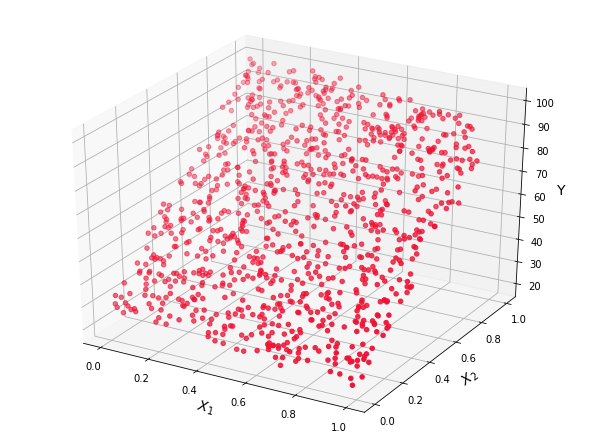

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], y, color='#ef1234')
ax.set_xlabel('$X_1$', fontsize = 14)
ax.set_ylabel('$X_2$', fontsize = 14)
ax.set_zlabel('Y', fontsize = 14)
plt.show()

# MLR with Analytical Solution <a name="Analytical_solution"></a>


In order to find the best estimate of ${\bf{\beta }}$ in the sense that the sum of squared residuals is minimized, we find the gradient of the MSE with respect to ${\bf{\beta }}$ as

\begin{equation*}
{\nabla _{\bf{\beta }}}J\left( {\bf{\beta }} \right) = \frac{1}{n}\left( {{\nabla _{\bf{\beta }}}{\bf{y}}{{\bf{y}}^T} - 2{\nabla _{\bf{\beta }}}{{\bf{\beta }}^T}{{\bf{X}}^T}{\bf{y}} + {\nabla _{\bf{\beta }}}{{\bf{\beta }}^T}{{\bf{X}}^T}{\bf{X\beta }}} \right) = \frac{2}{n}\left( {{{\bf{X}}^T}{\bf{X\beta }} - {{\bf{X}}^T}{\bf{y}}} \right).
\end{equation*}

We now set this gradient to zero in order to obtain the optimum ${{\bf{\hat \beta }}}$:

\begin{equation*}
{\nabla _{\bf{\beta }}}J = {\bf{0}} \to {\bf{\hat \beta }} = {\left( {{{\bf{X}}^T}{\bf{X}}} \right)^{ - 1}}{{\bf{X}}^T}{\bf{y}},
\end{equation*}

where ${\left( \cdot \right)^{ - 1}}$ denotes inverse matrix operation. Accordingly, the vector of fitted values is

\begin{equation*}
{\bf{\hat y}} = {\bf{X\hat \beta }} = {\bf{Hy}},
\end{equation*}

where the hat (influence) matrix, ${\bf{H}}$, is defined as

\begin{equation*}
{\bf{H}} = {\bf{X}}{\left( {{{\bf{X}}^T}{\bf{X}}} \right)^{ - 1}}{{\bf{X}}^T}.
\end{equation*}

Now, it is time to fit the model through the analyticl solution as the following.

In [3]:
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print('Parameters beta:\n', beta_hat)

Parameters beta:
 [[ 29.98613531]
 [-10.01600989]
 [ 70.06880731]]


The fitted model can be visualized in 3D space:

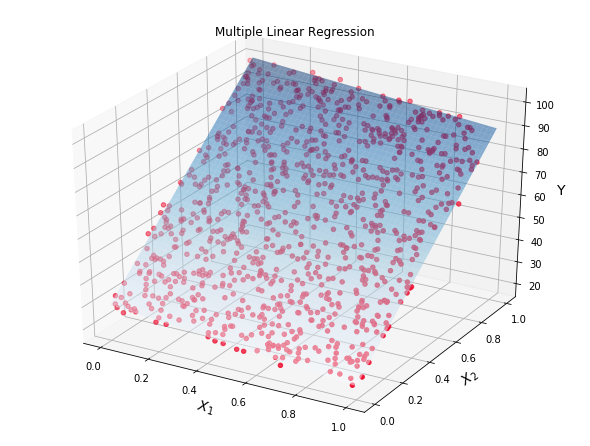

In [4]:
# Create the hyperplane 
xx1, xx2 = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 100), 
                       np.linspace(x[:, 1].min(), x[:, 1].max(), 100))
Y = beta_hat[0] + beta_hat[1] * xx1 + beta_hat[2] * xx2
# Plot data and the fitted hyperplane
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], y, color='#ef1234')

surf = ax.plot_surface(xx1, xx2, Y, cmap=plt.cm.Blues, alpha=0.5, linewidth=0)
ax.set_xlabel('$X_1$', fontsize = 14)
ax.set_ylabel('$X_2$', fontsize = 14)
ax.set_zlabel('Y', fontsize = 14)
ax.set_title('Multiple Linear Regression')
#ax.view_init(180, 0)

#fig.savefig('MLR.png')
plt.show()

# MLR with Gradient Descent <a name="Gradient_descent"></a>

In gradient descent approach, we minimize the cost function $J$ by iteratively moving in the direction of steepest descent. Accordingly, the parameter ${\bf{\beta }}$ can be updated every iteration in the form of 

\begin{equation*}
{\bf{\beta }} \leftarrow {\bf{\beta }} + \eta {\nabla _{\bf{\beta }}}J,
\end{equation*}
where

\begin{equation*}
{\nabla _{\bf{\beta }}}J = \frac{2}{n}\left( {{{\bf{X}}^T}{\bf{X\beta }} - {{\bf{X}}^T}{\bf{y}}} \right),
\end{equation*}

where $\eta$ is a constant step size (learning rate).

Coefficients: 
 [[ 30.08648115]
 [-10.08372323]
 [ 69.94759262]]
r2 score: 
 [0.99133539]


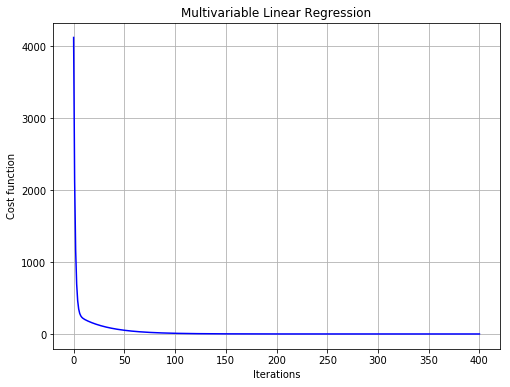

In [ ]:
class Multiple_Linear_Regression:
    # ----------------------------------------------------------
    def __init__(self, lr = 0.1, itr = 20):
                            # Initialization
        self.lr = lr        # Learning rate
        self.itr = itr      # Number of iterations (epochs)
    # ----------------------------------------------------------       
    def predict(self, x = [], flag = False):
        if flag==False:
            self.y_pred = self.X.dot(self.beta)
        else:
            x = np.insert(x,0,1,axis=1)
            self.y_pred = x.dot(self.beta)
        return self.y_pred
    # ----------------------------------------------------------        
    def cost_func(self):
        self.cost = sum((self.y - self.y_pred)**2)/len(self.y)
        return self.cost
    # ----------------------------------------------------------
    def gradient_descent(self):
        self.dbeta = 2/n_samples*(self.X.T.dot(self.X).dot(self.beta) - self.X.T.dot(self.y))      
    # ----------------------------------------------------------
    def update_params(self): 
        self.beta = self.beta - self.lr * self.dbeta
    # ----------------------------------------------------------
    def fit(self, x, y):       
        self.X = np.insert(x,0,1,axis=1)
        self.y = y
        
        n_samples, n_features = np.shape(x)
    
        # Initialize beta to 0
        self.beta = np.zeros((n_features + 1, 1))
        
        costs = []    
        while(self.itr+1):
            self.predict()
            self.cost_func()
            costs.append(self.cost)
            self.gradient_descent()
            self.update_params()
            self.itr -= 1
        return costs
    # ---------------------------------------------------------
    def R2_Score(self, x, y):
        ss_res = sum((self.predict(x, flag = True) - y)**2)
        ss_tot = sum((y - np.mean(y))**2)
        r2 = 1 - ss_res/ss_tot
        return r2     
# -------------------------------------------------------------
lr = 0.1
n_itr = 400

obj = Multiple_Linear_Regression(lr, n_itr)
J = obj.fit(x, y)

print('Coefficients: \n', obj.beta)

print('r2 score: \n', obj.R2_Score(x, y))
# -------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.plot(range(len(J)), J,  '-b')
plt.title('Multivariable Linear Regression')
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.grid()

# MLR with Scikit-Learn <a name="Scikit_learn"></a>

In this section, we do regression through Scikit-Learn package as the following.

In [ ]:
from sklearn.linear_model import LinearRegression

# Model Intialization
reg = LinearRegression()

# Data Fitting
reg = reg.fit(x, y)

# Y Prediction
#Y_pred = reg.predict(x)

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)
print('r2 score: \n', reg.score(x, y))

Intercept: 
 [29.98613531]
Coefficients: 
 [[-10.01600989  70.06880731]]
r2 score: 
 0.9913391109066515


In [ ]:
from datetime import datetime as dt
print("Completed running this Notebook at:", dt.now())

Completed running this Notebook at: 2019-07-10 23:06:08.067364


In [ ]:
# Clean up!
import os, signal; os.kill(os.getpid(), signal.SIGILL)